## Лабораторная работа №1 | Вариант 6

Выполнил: Полежаев Владислав 311

### 1. Numpy

In [1]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [2]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [3]:
matrix = np.zeros((5, 5), dtype=int)

for i in range(1, 5):
    matrix[i, :i] = np.arange(1, i + 1)

print(matrix)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 2 0 0 0]
 [1 2 3 0 0]
 [1 2 3 4 0]]


3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

У первого принта - 9.

У второго - 10, потому что sum из numpy перекрывает стандартный и его второй аргумент - ось, по который надо делать суммирование.

4. Как найти самое часто встречаемое значение между двумя массивами? 

In [4]:
from collections import Counter

def most_frequent_value(arr1: np.array, arr2: np.array) -> int:
    combined_arr = np.concatenate((arr1, arr2))
    counts = Counter(combined_arr)
    return counts.most_common(1)[0]

In [5]:
arr1 = np.array([1, 2, 3, 4, 5, 2, 2])
arr2 = np.array([3, 4, 4, 5, 6, 2, 2])

value, frequency = most_frequent_value(arr1, arr2)

print(value, frequency)

2 5


5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [6]:
import warnings

warnings.filterwarnings("ignore")

6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [7]:
from typing import Generator

def seq_int_numbers(start: int = 0) -> Generator[int, None, None]:
    for i in range(start, start + 10):
        yield i

In [8]:
print(np.array(list(seq_int_numbers())))
print(np.array(list(seq_int_numbers(10))))
print(np.array(list(seq_int_numbers(20))))

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]


7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [9]:
random_arr = np.sort(np.random.randint(1, 100, 10))
print(random_arr)

[ 1  8 11 11 21 52 64 71 90 90]


8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [10]:
cartesian_coords = np.random.rand(10, 2) * 10 

x, y = cartesian_coords[:, 0], cartesian_coords[:, 1]

r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

polar_coords = np.column_stack((r, theta))

print(cartesian_coords, polar_coords, sep='\n')

[[4.80829864 9.24202972]
 [8.34066353 3.1938263 ]
 [8.78242215 3.22576309]
 [0.93329259 3.15374502]
 [4.42907601 6.71354571]
 [0.35269679 6.93025332]
 [7.61043986 8.33160323]
 [0.92344714 1.8547121 ]
 [8.19033421 2.75857787]
 [9.33174697 9.77147134]]
[[10.418006    1.09106897]
 [ 8.93124821  0.36569812]
 [ 9.35609354  0.35200089]
 [ 3.28894249  1.28307624]
 [ 8.04291056  0.98761676]
 [ 6.9392223   1.51994786]
 [11.28425484  0.83060392]
 [ 2.071886    1.10883618]
 [ 8.64241439  0.32487534]
 [13.5115933   0.80841244]]


9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [11]:
pixel_dtype = np.dtype([
    ('x', 'int32'),
    ('y', 'int32'),
    ('r', 'uint8'),
    ('g', 'uint8'),
    ('b', 'uint8')
])

pixels = np.array([
    (10, 20, 255, 0, 0),
    (30, 40, 0, 255, 0),
    (50, 60, 0, 0, 255)
], dtype=pixel_dtype)

print(pixels)

[(10, 20, 255,   0,   0) (30, 40,   0, 255,   0) (50, 60,   0,   0, 255)]


10. Как конвертировать тип массив от float32 в int32 in place?

Нельзя поменять тип без создания нового обьекта

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv('student_perfomance.csv')

data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [14]:
data['Sleep_Hours'].mean()

np.float64(7.029060087785682)

2. Сколько процентов студентов посещают внеклассовые активности?

In [15]:
(data['Extracurricular_Activities'] == 'Yes').sum() * 100 / len(data)

np.float64(59.60345088542455)

3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [16]:
data.groupby('Gender')['Exam_Score'].mean()

Gender
Female    67.244898
Male      67.228894
Name: Exam_Score, dtype: float64

Правда

4. Выведите 25 и 75 перцентили времени сна студентов

In [17]:
sleep_25th = data['Sleep_Hours'].quantile(0.25)
sleep_75th = data['Sleep_Hours'].quantile(0.75)

print(sleep_25th, sleep_75th)

6.0 8.0


5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [18]:
group_better_sleep = data[data['Sleep_Hours'] >= sleep_75th]
group_less_sleep = data[data['Sleep_Hours'] <= sleep_25th]

avg_better_sleep = group_better_sleep['Exam_Score'].mean()
avg_less_sleep = group_less_sleep['Exam_Score'].mean()

print(avg_better_sleep, avg_less_sleep)

67.18704746580853 67.28109243697479


Неправда

6. Влияет ли физическая активность на результаты экзамена?

In [19]:
data['Exam_Score'].corr(data['Physical_Activity'])

np.float64(0.02782443618025739)

Практически не влияет

7. Правда ли, что слуденты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

In [20]:
with_high_education = data[(data['Parental_Education_Level'] == 'College') | (data['Parental_Education_Level'] == 'Postgraduate')]
without_high_education = data[data['Parental_Education_Level'] == 'High School']

avg_with_high_education = with_high_education['Exam_Score'].mean()
avg_without_high_education = without_high_education['Exam_Score'].mean()

print(avg_with_high_education, avg_without_high_education)

67.57528840315726 66.89357741234875


Правда

8. Как влияет участие родителей на результаты экзаменов

In [21]:
data.groupby('Parental_Involvement')['Exam_Score'].mean().sort_values()

Parental_Involvement
Low       66.358265
Medium    67.098156
High      68.092767
Name: Exam_Score, dtype: float64

Чем выше вовлеченность родителей, тем лучше результаты экзаменов.

9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [22]:
high_income = data[data['Family_Income'] == 'High']
low_medium_income = data[data['Family_Income'] != 'High']

avg_high_income = high_income['Exam_Score'].mean()
avg_low_medium_income = low_medium_income['Exam_Score'].mean()

print(avg_high_income, avg_low_medium_income)

67.84239558707644 67.09142000749344


Правда

10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

In [23]:
np.round(((data['Exam_Score'] > 0) & (data['Family_Income'] == 'Low') & (data['Internet_Access'] == 'No')).sum() * 100 / len(data), 2)

np.float64(3.19)

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

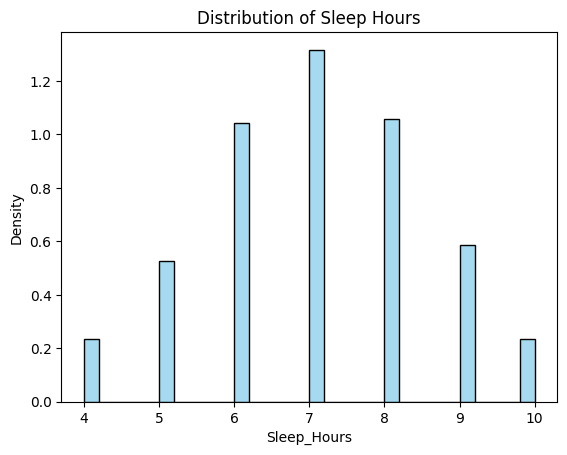

In [25]:
sns.histplot(data['Sleep_Hours'], stat="density", bins=30, color="skyblue")

plt.title('Distribution of Sleep Hours');

Правда

2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

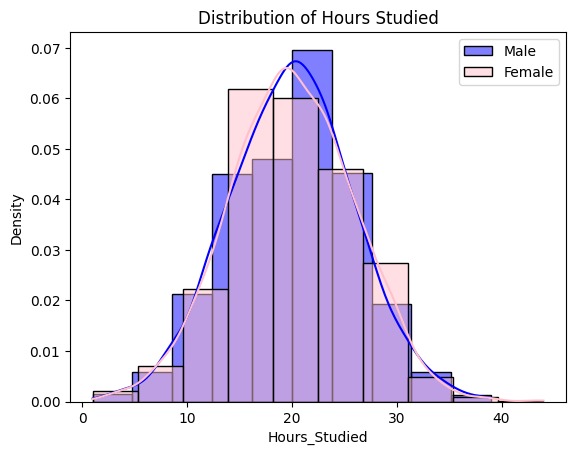

In [26]:
male_hours_studied = data[data['Gender'] == 'Male']['Hours_Studied']
female_hours_studied = data[data['Gender'] == 'Female']['Hours_Studied']

sns.histplot(male_hours_studied, color="blue", kde=True, stat="density", label="Male", bins=10)
sns.histplot(female_hours_studied, color="pink", kde=True, stat="density", label="Female", bins=10)

plt.title('Distribution of Hours Studied')
plt.legend();

3. Как зависит результат конечного экзамена от результата первого экзамена

In [27]:
data['Exam_Score'].corr(data['Previous_Scores'])

np.float64(0.17507908702291097)

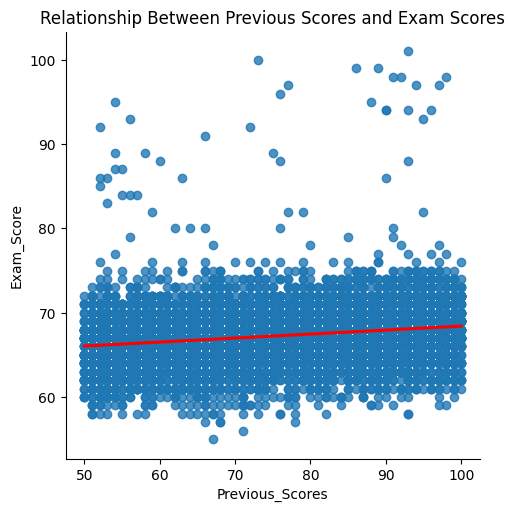

In [28]:
sns.lmplot(x='Previous_Scores', y='Exam_Score', data=data, ci=None, line_kws={'color': 'red'})

plt.title('Relationship Between Previous Scores and Exam Scores');

Результат итогового экзамена слабо зависит от результатов первого экзамена. Хотя существует небольшая положительная тенденция (чем выше первый балл, тем выше может быть итоговый), она не является сильной.

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

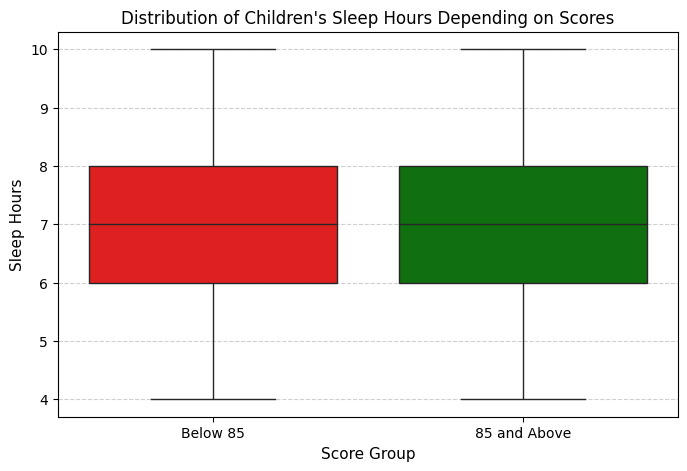

In [29]:
plt.figure(figsize=(8, 5))

sns.boxplot(x=data["Exam_Score"].apply(lambda x: "Below 85" if x < 85 else "85 and Above"),
            y=data["Sleep_Hours"],
            palette={"Below 85": "red", "85 and Above": "green"})

plt.title("Distribution of Children's Sleep Hours Depending on Scores", fontsize=12)
plt.xlabel("Score Group", fontsize=11)
plt.ylabel("Sleep Hours", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

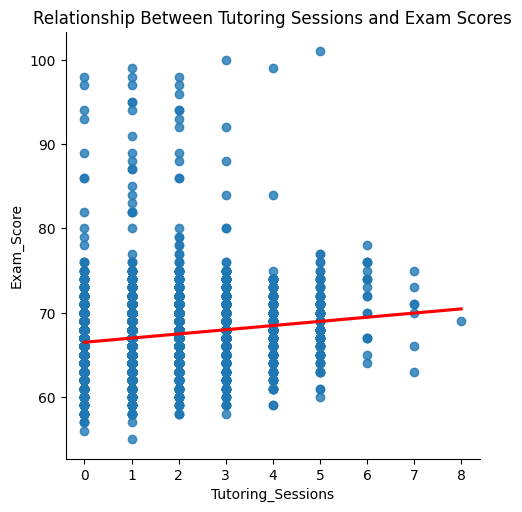

In [30]:
sns.lmplot(x='Tutoring_Sessions', y='Exam_Score', data=data, ci=None, line_kws={'color': 'red'});

plt.title('Relationship Between Tutoring Sessions and Exam Scores');

Правда

6. Как физическая активность влияет на успеваемость?

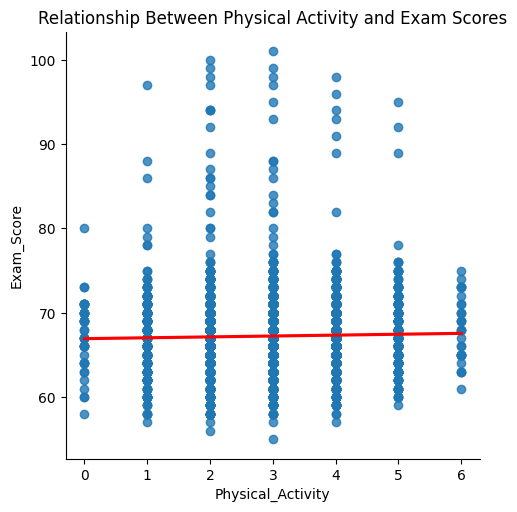

In [31]:
sns.lmplot(x='Physical_Activity', y='Exam_Score', data=data, ci=None, line_kws={'color': 'red'});

plt.title('Relationship Between Physical Activity and Exam Scores');

Явной линейной зависимости нет, однако можно заметить следующее: наибольший балл за тест получают люди со средней физической активностью (3 балла), а при отклонении от этого значения, средний балл уменьшается.

7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл

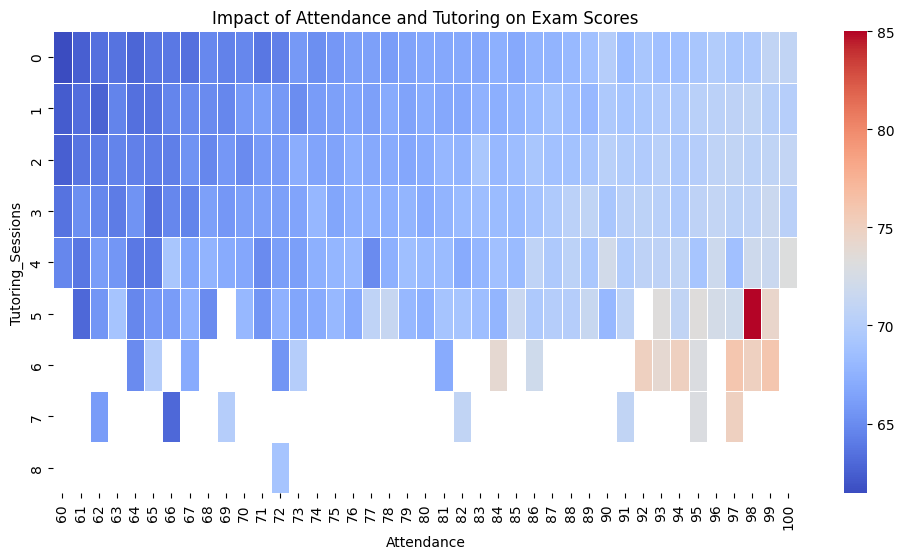

In [32]:
pivot_table = data.pivot_table(index="Tutoring_Sessions", columns="Attendance", values="Exam_Score", aggfunc="mean")

plt.figure(figsize=(12, 6))

sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5)

plt.xlabel("Attendance")
plt.ylabel("Tutoring_Sessions")
plt.title("Impact of Attendance and Tutoring on Exam Scores");